# Iris dataset
***

The Iris dataset is a study done by the the statistician and biologist Ronald Fisher in the year of 1936. It consist in the observation of iris flowers and I will analyse it in this project.
https://en.wikipedia.org/wiki/Iris_flower_data_set

This notebook is a detailed explanation of my Python script, analysis.py.
https://github.com/FatimaBOliveira/pands-project/blob/b176e1d0cc1c133d192bd1a79386e40216491a59/analysis.py

## Loading data
***
In order to analyse this data set, I downloaded it through the following link. Then I extracted the files from zip file into my pands-project folder/repository.
https://archive.ics.uci.edu/dataset/53/iris
Now to import the data into the script, I need to use Pandas library.
https://pandas.pydata.org/docs/getting_started/overview.html

In [5]:
import pandas as pd

The file iris.data contains the information about the samples, but because it doesn't have column names, I will give the names following the file iris.names, where it mentions the attributes of the samples in section 7. The code below shows how to load the data and add the column names  
Now with function pd.read_csv(), I write the path of the file, plus the column names.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [9]:
path = "./iris/"
logFilename = path + "iris.data"

colNames= ("sepal_length_cm",
    "sepal_width_cm", 
    "petal_length_cm", 
    "petal_width_cm", 
    "class" 
)

df = pd.read_csv(logFilename, sep=',', header=None, names=colNames)

## Summary of the variables
***
I requested the machine to describe the variables with a=df.describe() and then create a txt file with that information with the code a.to_csv().
https://www.w3schools.com/python/pandas/ref_df_describe.asp
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
https://saturncloud.io/blog/how-to-write-a-pandas-dataframe-to-a-txt-file/

In [12]:
a=df.describe()
a.to_csv('Summary of each variable.txt', sep="\t", mode="w")

I copied the details of the txt file in following table:

|     |sepal_length_cm   |sepal_width_cm    |petal_length_cm   |petal_width_cm    |
|-----|------------------|------------------|------------------|------------------|
|count|150.0	         |150.0	            |150.0	           |150.0             |
|mean |5.843333333333334 |3.0540000000000003|3.758666666666666 |1.1986666666666668|
|std  |0.8280661279778629|0.4335943113621737|1.7644204199522617|0.7631607417008414|
|min  |4.3               |2.0               |1.0               |0.1               |
|25%  |5.1	             |2.8	            |1.6	           |0.3               |
|50%  |5.8               |3.0           	|4.35              |1.3               |
|75%  |6.4               |3.3               |5.1               |1.8               |
|max  |7.9	             |4.4	            |6.9               |2.5               |

While analysing the results, I can see information about: 
* count - there's 150 samples; 
* mean - average number registered in the samples;
* std - standard deviation shows how far most of the values are from the mean values;
* min - minimum value registered;
* 25% - percentage of samples that between the minimum values and the value presented;
* 50% - percentage of samples between the values of 25%, exclusive, and 50% inclusive;
* 75% - percentage of samples between the values of 50%, exclusive, and 75% inclusive;
* max - maximum value registered.

## Histograms and bar charts
***
Now for the visulization of the variables, I need Numpy and Matplotlib libraries. [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) stores arrays in a easy and fast way and [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) reproduces plots of variables with images.

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Before I try to plot the variables, I need to know their type, because that will be determinant in which kind of plot can be used. So to get that information I use df.dtypes.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

In [16]:
df.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

Inside of the study there're float and object variables. Now I will simply call one the float variables with variable=df["column_name"] 
and check the arrays with the np.unique. And then I will check same for the object type.
https://www.datacamp.com/tutorial/python-select-columns
https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [25]:
slen = df["sepal_length_cm"]
values, counts = np.unique(slen, return_counts=True)
values, counts

(array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]),
 array([ 1,  3,  1,  4,  2,  5,  6, 10,  9,  4,  1,  6,  7,  6,  8,  7,  3,
         6,  6,  4,  9,  7,  5,  2,  8,  3,  4,  1,  1,  3,  1,  1,  1,  4,
         1], dtype=int64))

In [26]:
s = df["class"]
values, counts = np.unique(s, return_counts=True)
values, counts

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

The arrays show that float types cannot be represented in bar charts because the samples are going to be in top of each other, while the histogram can actually be better to represent because many values can be put together in the same interval, so it's easier to analyse. As for the object type, the bar chart can be used because there's only 3 answers inside of it, with a clear number of different class of Iris flowers, as demonstrated above.

### Histogram of variables together
***
To do the histogram, I need to call variables for each attribute. After that I use the function plt.hist() for each variables, with edge colour customization to be easy to identify them, then I add title with plt.title, labels of each axis with ptl.xlabel and ptl.ylabel, a legend with ptl.legend(). To save the histogram as an png file, I use the function plt.savefig(). Finally plot the histogram with plt.show().
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

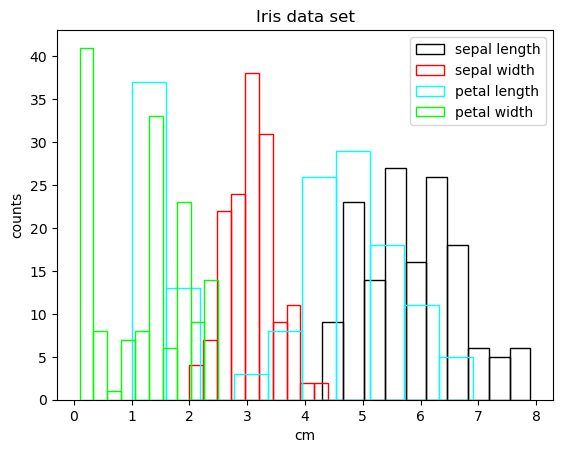

In [27]:
slen = df["sepal_length_cm"]
swid = df["sepal_width_cm"]
plen = df["petal_length_cm"]
pwid = df["petal_width_cm"]

plt.hist(slen, label= "sepal length", edgecolor = "black", fill=False)
plt.hist(swid, label= "sepal width", edgecolor = "red", fill=False)
plt.hist(plen, label= "petal length", edgecolor = "cyan",  fill=False)
plt.hist(pwid, label="petal width", edgecolor = "lime", fill=False)
plt.title("Iris data set")
plt.xlabel("cm")
plt.ylabel("counts")
plt.legend()
#plt.savefig("Histogram with variables together.png") 
plt.show()

### Histograms of each variable
***
There's another possible way to plot the variables in different histograms in a single figure. In this case, I need to call each variable individually in the DataFrame with pd.DataFrame(). Then use the fig, axes = plt.subplots() so I can create a figure with 4 histograms with the layout 2x2 and then size as following.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://www.tutorialspoint.com/how-to-plot-two-histograms-side-by-side-using-matplotlib
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

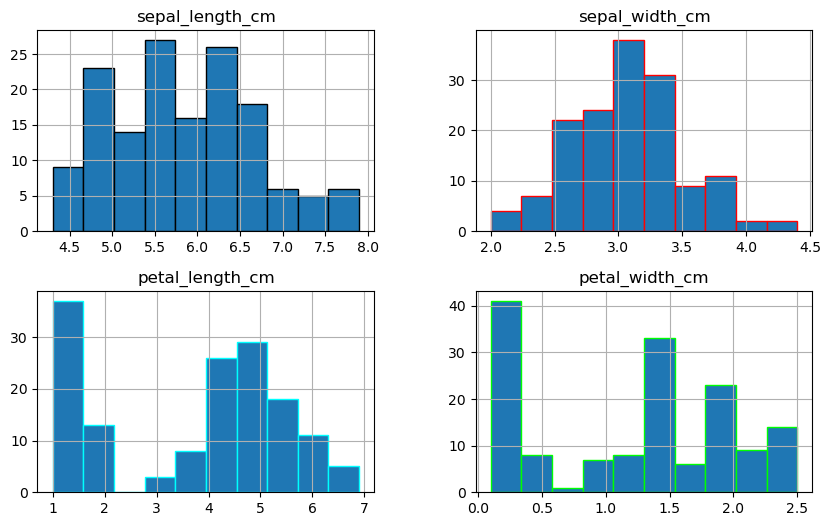

In [48]:
df1 = pd.DataFrame(slen)
df2 = pd.DataFrame(swid)
df3 = pd.DataFrame(plen)
df4 = pd.DataFrame(pwid)
fig, axes = plt.subplots(2,2, figsize=(10, 6))

df1.hist(ax=axes[0, 0], edgecolor = "black")
df2.hist(ax=axes[0, 1], edgecolor = "red")
df3.hist(ax=axes[1, 0], edgecolor = "cyan")
df4.hist(ax=axes[1, 1], edgecolor = "lime")
#plt.savefig("Histograms of each variable.png") 
plt.show()

***
## End